In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
car_data=pd.read_csv("C:/Users/hp/Documents/cardata.csv")
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: xlabel='Year', ylabel='Count'>

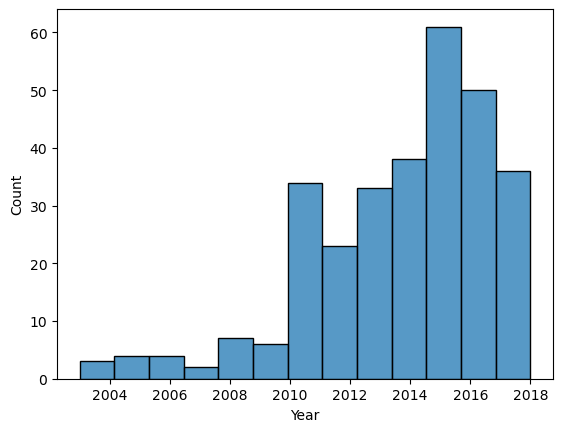

In [7]:
sns.histplot(x='Year',data=car_data)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

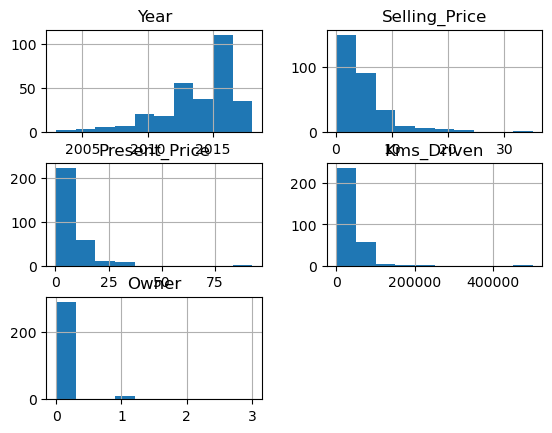

In [8]:
car_data.hist()

C:\Users\hp\AppData\Local\Temp\ipykernel_22604\2290840806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Year'],color='red')


<Axes: xlabel='Year', ylabel='Density'>

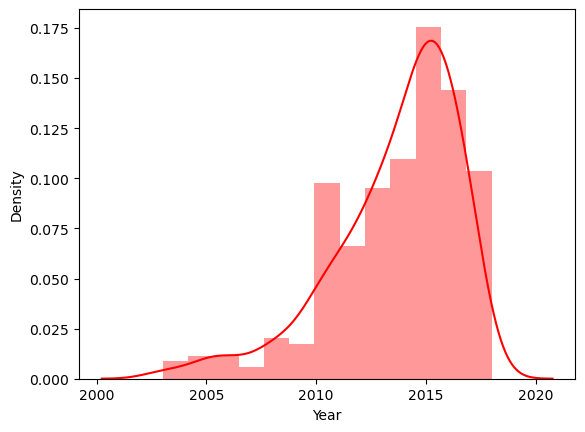

In [9]:
sns.distplot(car_data['Year'],color='red')

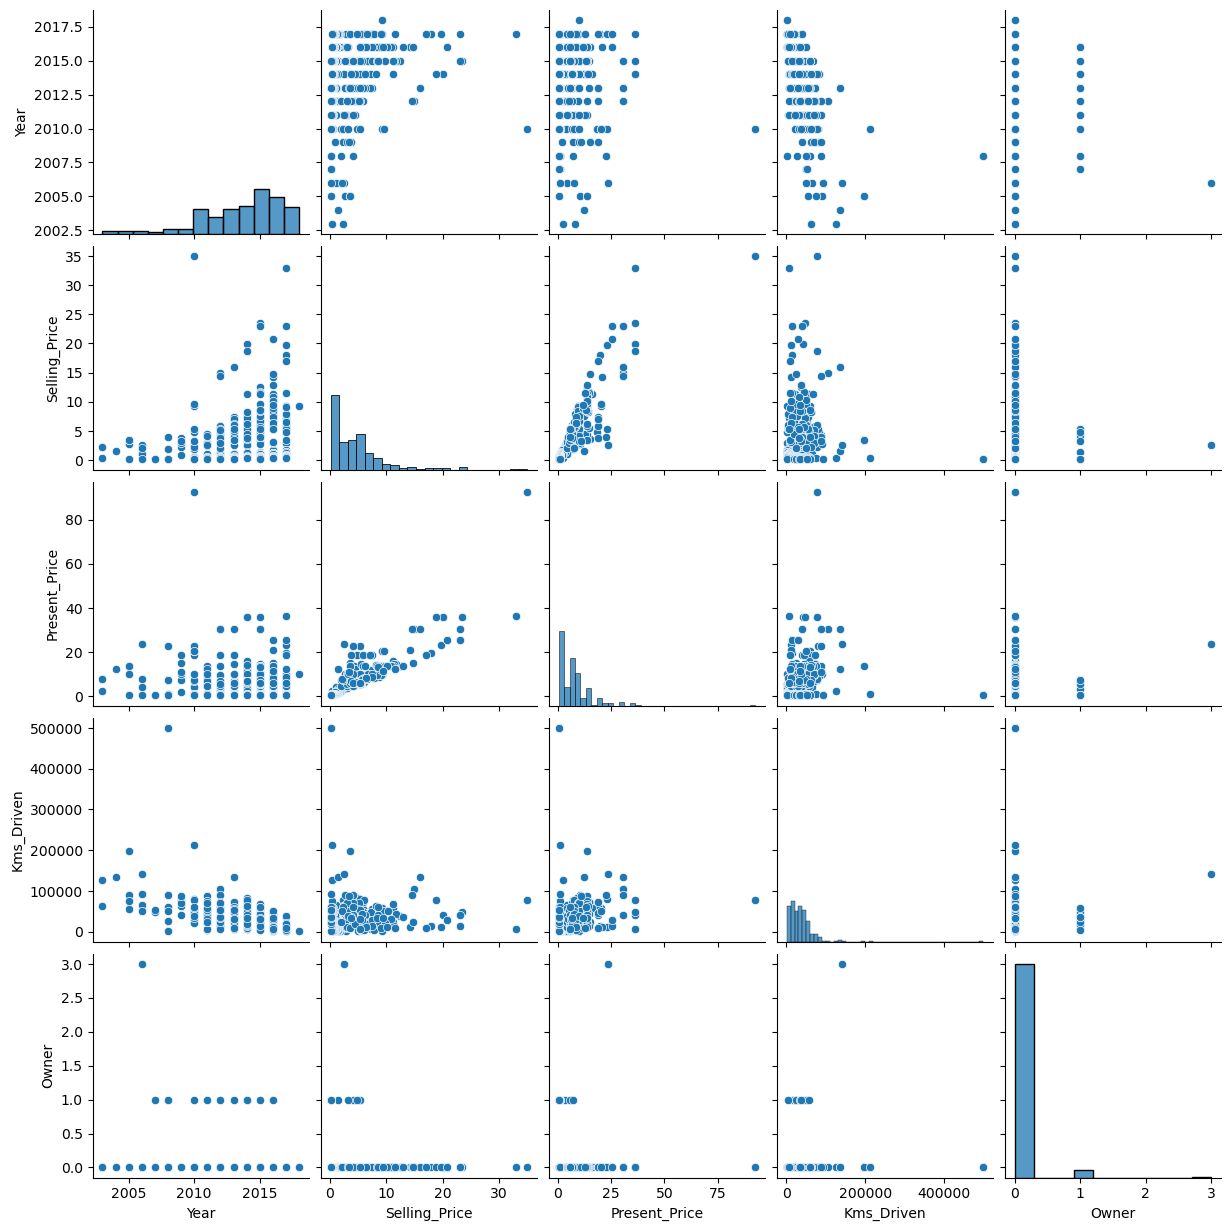

In [10]:
sns.pairplot(car_data)

In [11]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [12]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22604\2458407715.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)


In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [14]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,1,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,0,Dealer,Manual,0


In [15]:
car_data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [16]:
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22604\3735344870.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)


In [17]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0


In [18]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,Manual,0
297,brio,2015,4.00,5.9,60000,0,0,Manual,0
298,city,2009,3.35,11.0,87934,0,0,Manual,0
299,city,2017,11.50,12.5,9000,1,0,Manual,0
300,brio,2016,5.30,5.9,5464,0,0,Manual,0


In [19]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [20]:
car_data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [21]:
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22604\422960560.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)


In [22]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [23]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [24]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [25]:
car_data = car_data.drop('Car_Name',axis = 1)

In [26]:
car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


In [27]:
correlation = car_data.corr()
correlation

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


<Axes: >

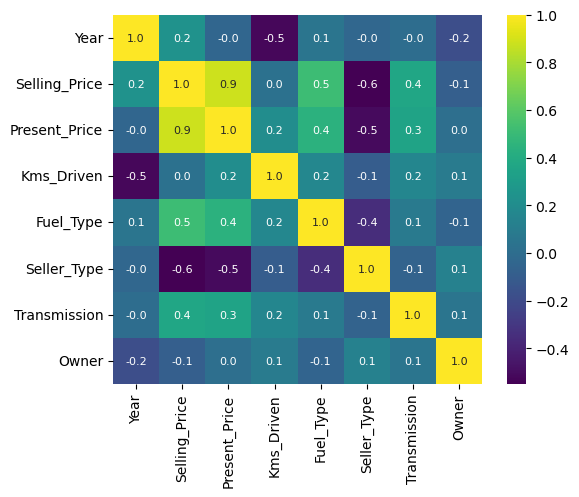

In [28]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True, annot_kws={'size':8},cmap='viridis')

In [29]:
x = car_data.drop('Selling_Price',axis=1)
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [30]:
y = car_data['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 2)

In [32]:
x.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape,y.shape

((301, 7), (240, 7), (61, 7), (240,), (61,), (301,))

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
training_data_predict = model.predict(x_train)
training_data_accuracy = metrics.r2_score(training_data_predict,y_train)
print('accuracy of training data:',training_data_accuracy)

accuracy of training data: 0.8685439505823465


In [36]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = metrics.r2_score(testing_data_predict,y_test)
print('accuracy of testing data:',testing_data_accuracy)

accuracy of testing data: 0.8193296211106084


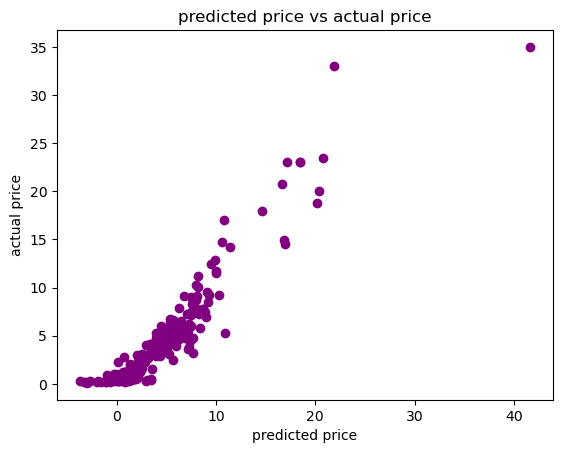

In [37]:
plt.scatter(training_data_predict,y_train,color = 'purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

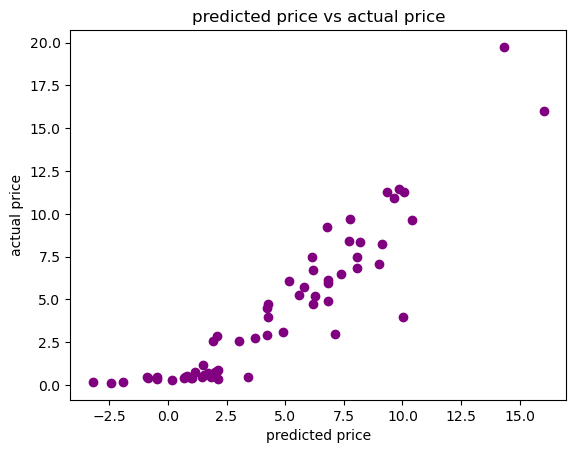

In [38]:
plt.scatter(testing_data_predict,y_test,color = 'purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso()

In [41]:
lasso.fit(x_train,y_train)

Lasso()

In [42]:
training1_data_predict = lasso.predict(x_train)
training1_data_accuracy = metrics.r2_score(training1_data_predict,y_train)
print('accuracy of training data:',training1_data_accuracy)

accuracy of training data: 0.7999397993548052


In [43]:
testing1_data_predict = lasso.predict(x_test)
testing1_data_accuracy = metrics.r2_score(testing1_data_predict,y_test)
print('accuracy of testing data:',testing1_data_accuracy)

accuracy of testing data: 0.7717678246278714


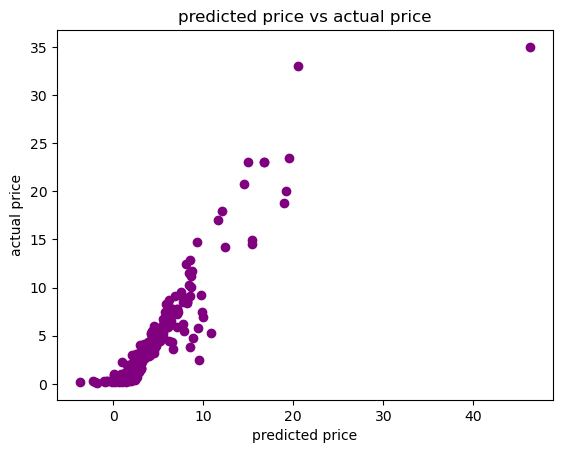

In [44]:
plt.scatter(training1_data_predict,y_train,color = 'purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

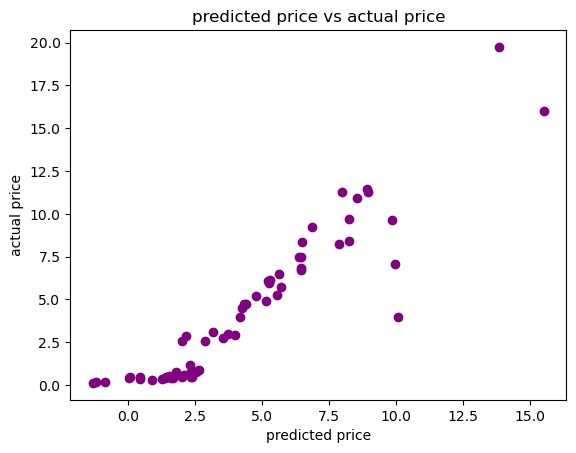

In [45]:
plt.scatter(testing1_data_predict,y_test,color = 'purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [46]:
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [47]:
training2_data_predict = ridge.predict(x_train)
training2_data_accuracy = metrics.r2_score(training2_data_predict,y_train)
print('accuracy of training data:',training2_data_accuracy)

accuracy of training data: 0.8681591463364058


In [48]:
testing2_data_predict = ridge.predict(x_test)
testing2_data_accuracy = metrics.r2_score(testing2_data_predict,y_test)
print('accuracy of training data:',testing2_data_accuracy)

accuracy of training data: 0.820438598404782


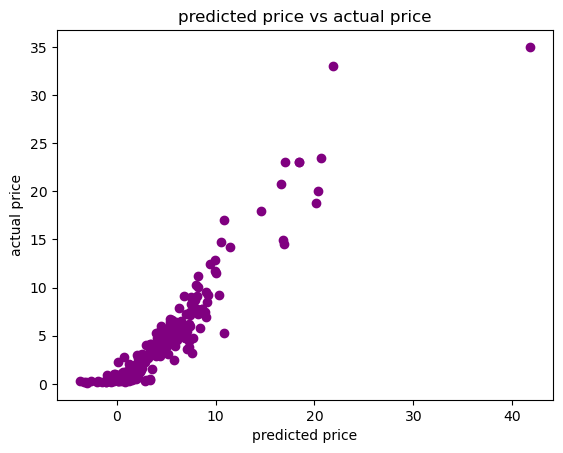

In [49]:
plt.scatter(training2_data_predict,y_train,color='purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

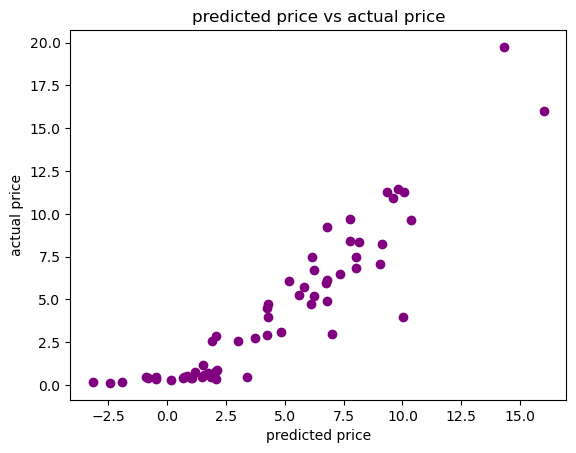

In [50]:
plt.scatter(testing2_data_predict,y_test,color='purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [117]:
input_data = (2014,5.59,27000,0,0,0,0)
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1, -1)
prediction = lasso.predict(input_data_reshaped)
print('predicted price of car',prediction[0])

predicted price of car 3.815496333665237


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
